# Cars Dataset - Visualization

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency.

The global auto industry, including Americans and their European and Japanese competitors, raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel-efficient.

Data of 398 unique cars along with their respective specification, origin country, and model year.

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

<img src="ford-mustang-stallion-red-57409.jpeg" width='800' /> 

Dataset: https://data.world/dataman-udit/cars-data (cars_multi)

Attributes:
- id: string (Unique values - PK)
- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model: multi-valued discrete
- origin: multi-valued discrete (FK)
- car name: string (Unique values)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

The first step in the process of analyzing the datasets is loading them into the notebook.

In [57]:
auto = pd.read_csv('auto_industry.csv')

In [58]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Descriptive Statistics

Let´s take a look at the data:

In [59]:
auto.shape

(398, 9)

- dataframe with 398 rows and 9 columns.

In [60]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- notice that horsepower has less elements (only 392, with 6 null values)

In [61]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


- Basic statistical details like percentile, mean, std etc, of the dataframe.

## Histogram

Let´s plot an histogram for the following numeric columns: 'mpg', 'displacement', 'horsepower', 'weight', and 'acceleration'.

In [62]:
# define a list with the numeric columns
num_col = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

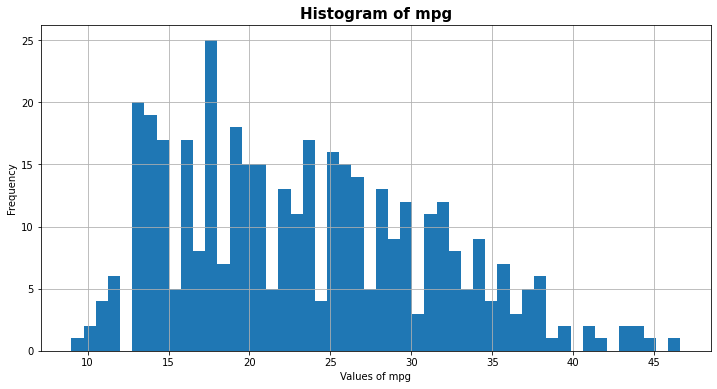

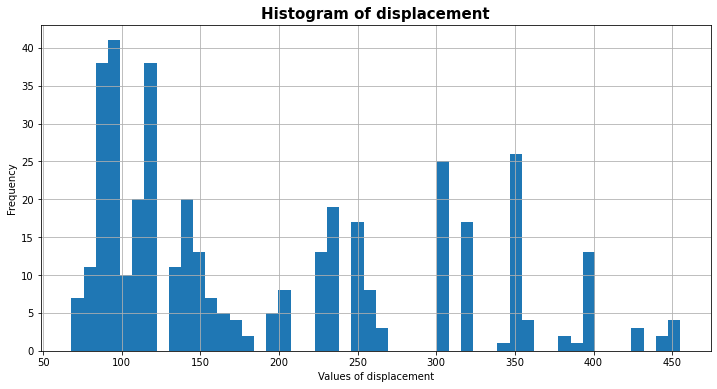

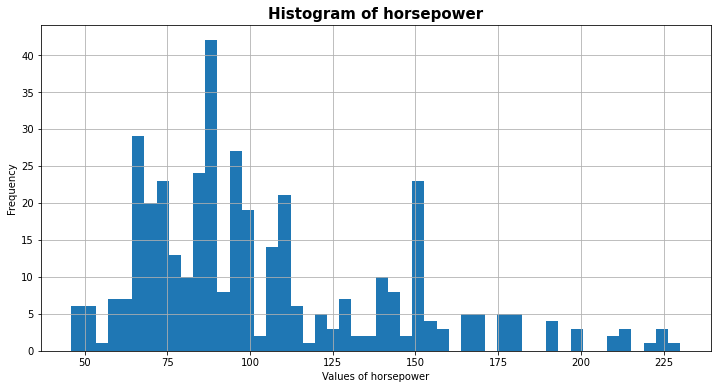

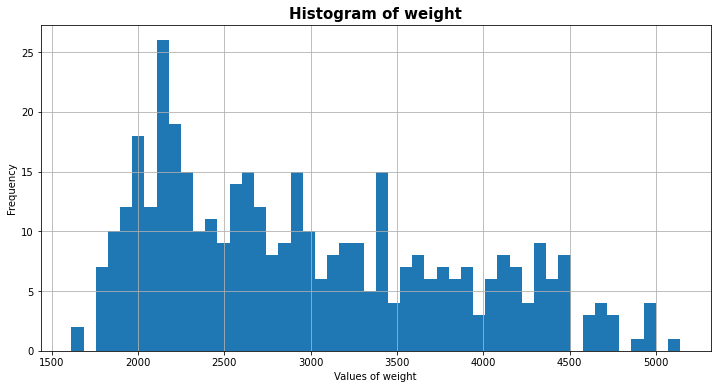

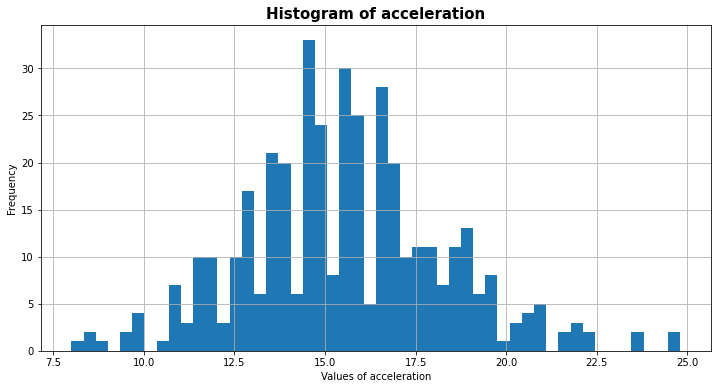

In [63]:
# Create histograms for each one of the numeric columns

for col in (num_col):

    plt.figure(figsize=(12, 6))

    # Add elements to the graphic
    plt.hist(auto[col], bins=50)

    # Insert titles
    plt.title(f'Histogram of {col}', fontsize=15, fontweight='bold')
    plt.xlabel(f'Values of {col}')
    plt.ylabel('Frequency')
    
    # Add grid lines
    plt.grid()
    
    # Show the figure
    plt.show()

### Boxplot

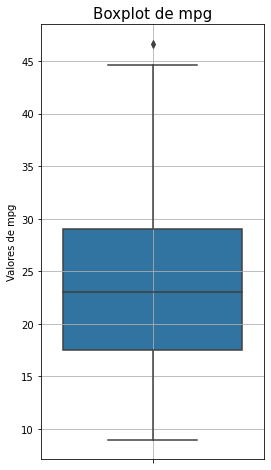

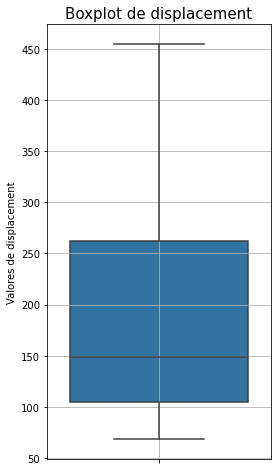

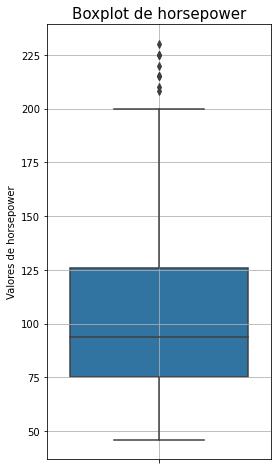

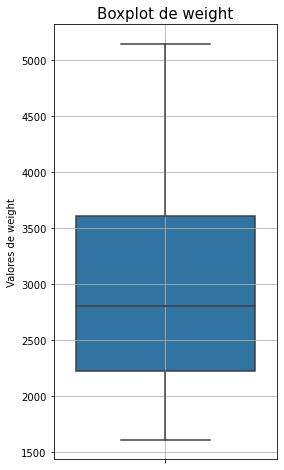

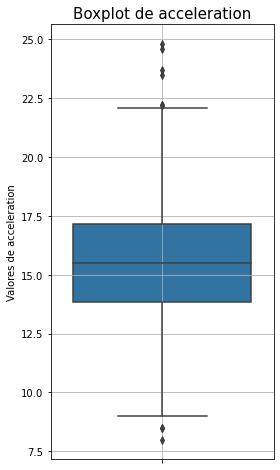

In [64]:
# Create boxplots for each one of the numeric columns

for col in num_col:
    plt.figure(figsize=(4,8))
    
    #using seaborn to insert elements
    sns.boxplot(y = auto[col], orient = 'v')
    
    plt.title(f'Boxplot de {col}', fontsize = 15)
    plt.ylabel(f'Valores de {col}')
    
    plt.grid()
    
    plt.show()

## How weight afects mpg

Let´s do some scatter plots to see this relation:

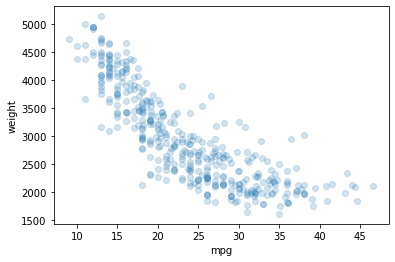

In [65]:
# Seaborn
sns.regplot(x = "mpg", y="weight", data=auto, fit_reg = False, scatter_kws={"alpha": 0.2})
plt.show()

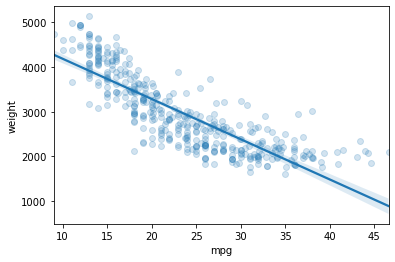

In [66]:
#same graphic with a regression model
sns.regplot(x = "mpg", y="weight", data=auto, scatter_kws={"alpha": 0.2})
plt.show()

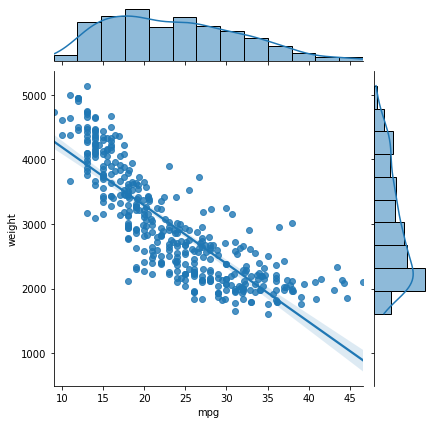

In [67]:
sns.jointplot(x = "mpg", y="weight", data=auto, kind = 'reg')
plt.show()

- We can see a negative (inverse) correlation between MPG and weight. Heavier cars have a lower efficiency.

## How is the distribution of MPG for each year of the sample?

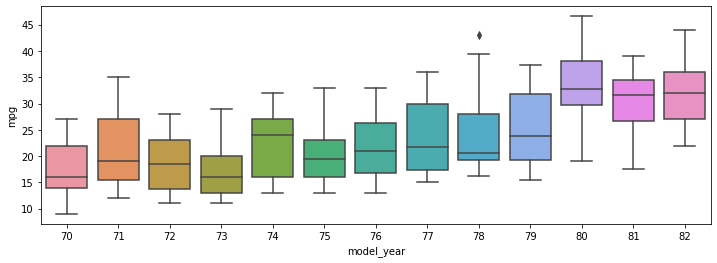

In [68]:
# using boxplots
plt.figure(figsize=(12, 4))
sns.boxplot(x = auto['model_year'], y = auto['mpg'])
plt.show()

- We can see an increase of MPG during time.

## How is the distribution of MPG according to the origin

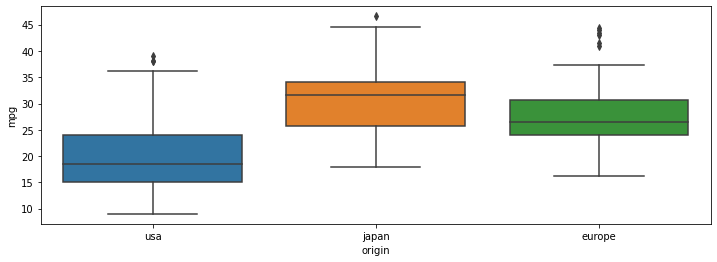

In [69]:
#using boxplots
plt.figure(figsize=(12, 4))
sns.boxplot(x = auto['origin'], y = auto['mpg'])
plt.show()

- Cars in USA used to have a lower MPG than cars from Japan or Europe. USA cars are less efficient.

## How is the weight according to the origin

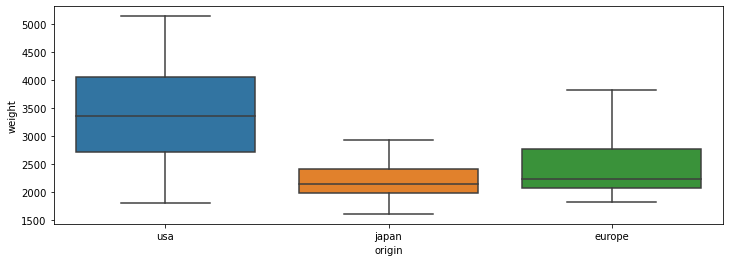

In [70]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = auto['origin'], y = auto['weight'])
plt.show()

- Cars from USA weight more than cars from Japan or Europe.

## Looking for missing data in the dataset

In [71]:
auto.isna().any().any()

True

In [72]:
auto.isna().sum().sum()

6

In [73]:
auto.loc[:, auto.isnull().any()].columns

Index(['horsepower'], dtype='object')

In [74]:
np.where(pd.isnull(auto))

(array([ 32, 126, 330, 336, 354, 374], dtype=int64),
 array([3, 3, 3, 3, 3, 3], dtype=int64))

- The dataset has 6 missing value in the 'horsepower' feature.

## Dealing with missing values

There are a lot of ways to deal with missing data. If there is a lot of missing data in the same column, you can drop the column. If there is just a few missing data, you can drop the rows. You can also substitute the values by the mean or the median. 

Here, I decide to substitute the values for the mean of their category. Since the horsepower is linked to the number of cylinders in the vehicle, I’m going to use the mean of the horsepower according to the number of cylinders.

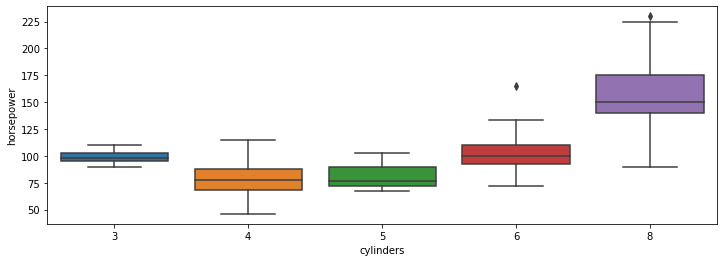

In [75]:
# verifying the relationship between horsepower and cylinders
plt.figure(figsize=(12, 4))
sns.boxplot(x = auto['cylinders'], y = auto['horsepower'])
plt.show()

- There is a clear relatioship between the numbers of cylinders and horsepower, since the low variation of value of this feature.

First, I'm going to select all the rows with NaN values and check the number of cylinders.

In [76]:
auto1 = auto[auto['horsepower'].isnull()]

In [77]:
auto1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


 - We have missing data in cars with 4 and 6 cylinders.

Let´s calculate the mean horsepower values for the cars with 4 cylinders:

In [78]:
# select only cars with 4 cylinders
auto_c4 = auto[auto['cylinders'] == 4]
auto_c4

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504
21,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [79]:
# is there any null values?
auto_c4.isna().any().any()

True

In [80]:
# finally, calculate the mean of horsepower for the select rows, ignoring the NaN values
c4 = auto_c4['horsepower'].mean(skipna = True) 

Now, let´s calculate the mean horsepower values for the cars with 6 cylinders:

In [81]:
# select only cars with 4 cylinders
auto_c6 = auto[auto['cylinders'] == 6]
auto_c6

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
15,22.0,6,198.0,95.0,2833,15.5,70,usa,plymouth duster
16,18.0,6,199.0,97.0,2774,15.5,70,usa,amc hornet
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
24,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin
...,...,...,...,...,...,...,...,...,...
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl
366,17.6,6,225.0,85.0,3465,16.6,81,usa,chrysler lebaron salon
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


In [82]:
# is there any null values?
auto_c6.isna().any().any()

True

In [83]:
# finally, calculate the mean of horsepower for the select rows, ignoring the NaN values
c6 = auto_c6['horsepower'].mean(skipna = True) 

Now, we just need a loop to substitute the correct values in the dataframe:

In [84]:
# loop to substitute the missing values in cars with 4 and 6 cylinders

for i in auto:
    if (auto['cylinders'] == 4).any(): 
        auto['horsepower'].fillna(c4, inplace = True) 
    elif (auto['cylinders'] == 6).any():
        auto['horsepower'].fillna(c6, inplace = True)

Let's check if we have any missing values now:

In [85]:
auto.isna().sum().sum()

0

- It looks like we fixed the missing values.

In [86]:
# just checking again the dataframe:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Let's check for duplicates

In [88]:
auto.drop_duplicates(keep=False,inplace=True)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


- There are no duplicates in this dataframe.

In [89]:
auto['origin'].str.capitalize()

0         Usa
1         Usa
2         Usa
3         Usa
4         Usa
        ...  
393       Usa
394    Europe
395       Usa
396       Usa
397       Usa
Name: origin, Length: 398, dtype: object

## Let's explore the [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function to create dynamic tables

A pivot table that return the mean value of MPG per model year:

In [90]:
pivot_auto = pd.pivot_table(auto, index = 'model_year', values = 'mpg')

pivot_auto

,mpg
model_year,
70,17.689655
71,21.250000
72,18.714286
73,17.100000
74,22.703704
75,20.266667
76,21.573529
77,23.375000
78,24.061111


Now, a pivot table with the MPG mean according to the number of cylinders:

In [91]:
pivot_auto1 = pd.pivot_table(auto, index = 'cylinders', values = 'mpg')

pivot_auto1

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


Finally, a pivot table with the model year as index and the mean values of the MPG according to the number of cylinders:

In [92]:
pivot_auto2 = pd.pivot_table(auto, index = 'model_year', columns = 'cylinders', values = 'mpg')

pivot_auto2

cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,25.285714,NaN,20.500000,14.111111
71,NaN,27.461538,NaN,18.000000,13.428571
72,19.0,23.428571,NaN,NaN,13.615385
73,18.0,22.727273,NaN,19.000000,13.200000
74,NaN,27.800000,NaN,17.857143,14.200000
75,NaN,25.250000,NaN,17.583333,15.666667
76,NaN,26.766667,NaN,20.000000,14.666667
77,21.5,29.107143,NaN,19.500000,16.000000
78,NaN,29.576471,20.3,19.066667,19.050000


## Using the groupby() function to aggregate the data by origin and number of cylinders to calculate the mean horsepower.

In [93]:
auto.groupby(['origin','cylinders'])[['horsepower']].mean()


horsepower
origin cylinders            
europe 4           78.310521
       5           82.333333
       6          113.500000
japan  3           99.250000
       4           75.579710
       6          115.833333
usa    4           80.845059
       6           99.382181
       8          158.300971

## Creating a new column with the Continents according to the origin of the car

In [94]:
cont_dic = {'usa': 'North America', 'europe': 'Europe', 'japan': 'Asia'}
auto['continent'] = auto['origin'].map(cont_dic)

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,continent
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,North America
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,North America
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,North America
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,North America
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,North America
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,North America
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,North America
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,North America


## Creating a new column with the weight/potency ratio and ploting it's relation with the MPG

In [95]:
auto['weight/potency ratio'] = auto.apply(lambda row: row.weight / row.horsepower, axis=1)

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,continent,weight/potency ratio
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,North America,26.953846
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,North America,22.381818
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,North America,22.906667
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,North America,22.886667
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,North America,24.635714
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,North America,32.441860
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,Europe,40.961538
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,North America,27.321429
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,North America,33.227848


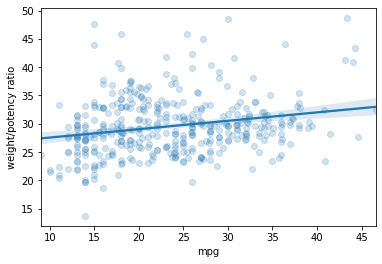

In [96]:
sns.regplot(x = "mpg", y="weight/potency ratio", data=auto, scatter_kws={"alpha": 0.2})
plt.show()

## Using the [get_group()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) function to create a new dataframe only with cars from USA 

In [87]:
origin_usa = auto.groupby("origin")

group_usa = origin_usa.get_group("usa")

group_usa

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
